# Import lib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score,classification_report,roc_auc_score, roc_curve
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("cancer.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.drop("Unnamed: 32", axis = 1, inplace = True)

In [7]:
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA

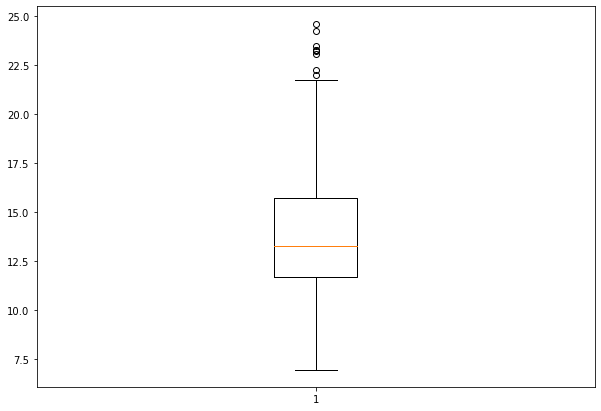

0      1.097064
1      1.829821
2      1.579888
3     -0.768909
4      1.750297
         ...   
564    2.110995
565    1.704854
566    0.702284
567    1.838341
568   -1.808401
Name: zscore, Length: 564, dtype: float64


In [9]:
import scipy.stats as stats
fig=plt.figure(figsize=(10,7))
df=df.fillna(value=0)
df['zscore']=stats.zscore(df['radius_mean'])
df=df[df['zscore']>-3]
df=df[df['zscore']<3]
plt.boxplot(df['radius_mean'])
plt.show()
print(df['zscore'])

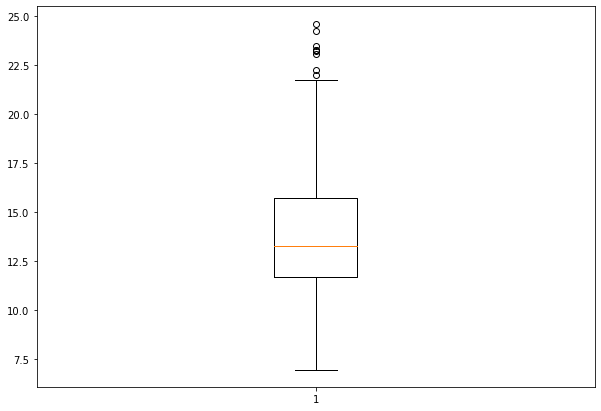

Average:  14.015476950354621
STD:  3.3306779399143718
Min Value 4.023443130611506
Max Value 24.00751077009774
count    562.000000
mean      13.978379
std        3.277810
min        6.981000
25%       11.682500
50%       13.280000
75%       15.707500
max       23.510000
Name: radius_mean, dtype: float64


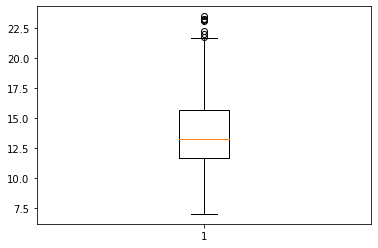

In [10]:
fig=plt.figure(figsize=(10,7))
df=df.fillna(value=0)
plt.boxplot(df['radius_mean'])
plt.show()
print('Average: ',df['radius_mean'].mean())
print("STD: ",df['radius_mean'].std())
min_value=df['radius_mean'].mean()-3*df['radius_mean'].std()
max_value=df['radius_mean'].mean()+3*df['radius_mean'].std()
print("Min Value",min_value)
print("Max Value",max_value)
df1=df[(df['radius_mean']<max_value) & (df['radius_mean']>min_value)]
print(df1['radius_mean'].describe())
plt.boxplot(df1['radius_mean'])
plt.show()

In [11]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,zscore
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.097064
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.829821
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.579888
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,-0.768909
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.750297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,2.110995
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.704854
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.702284
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.838341


In [12]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
zscore                     0
dtype: int64

In [13]:
M = df[(df['diagnosis'] != 0)]
B = df[(df['diagnosis'] == 0)]

In [14]:
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'red', 'green'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [15]:
trace = go.Pie(labels = ['benign','malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green', 'red'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [16]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['red', 'green']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [17]:
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)

In [18]:
plot_distribution('radius_se', .1)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', .5)
plot_distribution('area_se', 5)

In [19]:
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)

# Feature Engineering

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

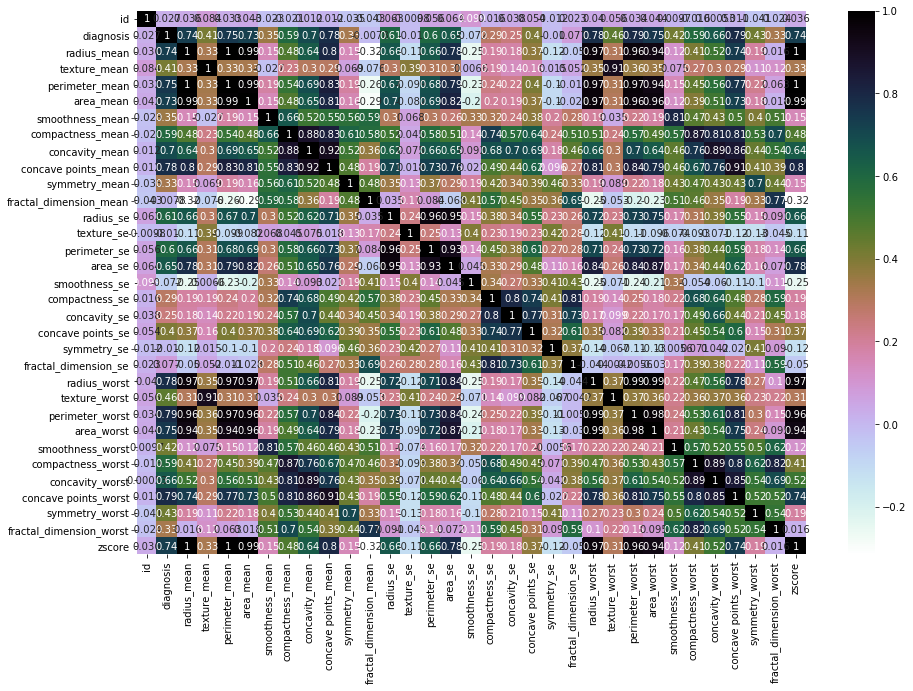

In [21]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()

In [22]:
X=df[['radius_mean','concave points_mean','perimeter_se','area_se','radius_se','texture_se']]
Y=df[['diagnosis']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)


In [68]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.9181600955794506


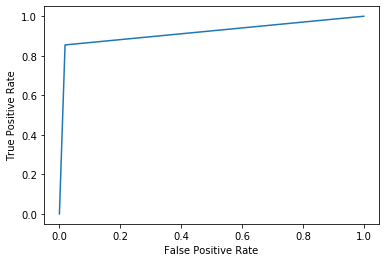

In [69]:
plot_roc_curve(y33_test,predict3)
print(f'model 1 AUC score: {roc_auc_score(y33_test,predict3)}')

# Classifier


In [50]:
#Model 1
X1=df[['radius_mean','texture_mean','perimeter_mean','area_mean','concave points_mean','perimeter_se','area_se','radius_se','texture_se'
     ,'radius_worst','texture_worst','perimeter_worst','area_worst']]
Y1=df[['diagnosis']]
x1_train,x11_test,y1_train,y11_test=train_test_split(X1,Y1,test_size=0.3,random_state=5)
reg=svm.SVC()
reg.fit(x1_train,y1_train)
predict1=reg.predict(x11_test)
print(reg.score(x1_train,y1_train))
print(reg.score(x11_test,y11_test))
print(accuracy_score(y11_test,predict1))
print(classification_report(y11_test,predict1))
print(confusion_matrix(y_test,predict1))


0.9137055837563451
0.9352941176470588
0.9352941176470588
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       108
           1       0.96      0.85      0.91        62

    accuracy                           0.94       170
   macro avg       0.94      0.92      0.93       170
weighted avg       0.94      0.94      0.93       170

[[106   2]
 [  9  53]]


In [51]:
#Model2
X2=df[['radius_mean','concave points_mean','perimeter_se','area_se','radius_se','texture_se']]
Y2=df[['diagnosis']]
x2_train,x22_test,y2_train,y22_test=train_test_split(X2,Y2,test_size=0.3,random_state=5)
reg=svm.SVC()
reg.fit(x2_train,y2_train)
predict2=reg.predict(x22_test)
print(reg.score(x2_train,y2_train))
print(reg.score(x22_test,y22_test))
print(accuracy_score(y22_test,predict2))
print(classification_report(y22_test,predict2))
print(confusion_matrix(y22_test,predict2))

0.8705583756345178
0.8705882352941177
0.8705882352941177
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       108
           1       0.88      0.74      0.81        62

    accuracy                           0.87       170
   macro avg       0.87      0.84      0.85       170
weighted avg       0.87      0.87      0.87       170

[[102   6]
 [ 16  46]]


In [52]:
#Model3
X3=df[['area_mean','radius_worst','texture_worst','area_worst']]
Y3=df[['diagnosis']]
x3_train,x33_test,y3_train,y33_test=train_test_split(X3,Y3,test_size=0.3,random_state=5)
reg=svm.SVC()
reg.fit(x3_train,y3_train)
predict3=reg.predict(x33_test)
print(reg.score(x3_train,y3_train))
print(reg.score(x33_test,y33_test))
print(accuracy_score(y33_test,predict3))
print(classification_report(y33_test,predict3))
print(confusion_matrix(y33_test,predict3))

0.9137055837563451
0.9352941176470588
0.9352941176470588
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       108
           1       0.96      0.85      0.91        62

    accuracy                           0.94       170
   macro avg       0.94      0.92      0.93       170
weighted avg       0.94      0.94      0.93       170

[[106   2]
 [  9  53]]


# hyper parameter tuning

In [ ]:
#using grid search cv for hyper parameter tuning

In [62]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']} 

In [63]:
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
# fitting the x and y train in grid

In [64]:
grid.fit(x3_train, y3_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.658 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.658 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.615 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.924 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.835 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.923 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [65]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [66]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.0001)


In [67]:
grid_predictions = grid.predict(x33_test)
print(classification_report(y33_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        62

    accuracy                           0.92       170
   macro avg       0.92      0.91      0.92       170
weighted avg       0.92      0.92      0.92       170



In [61]:
'''after hyperparameter tuning the accuracy has decreased by 2 percentage so we 
can go with the earlier model using fixed paramters'''

'after hyperparameter tuning the accuracy has decreased by 2 percentage so we \ncan go with the earlier model using fixed paramters'